<a href="https://colab.research.google.com/github/yuanjinren/DS-Unit-4-Sprint-3-Deep-Learning/blob/main/DS-Unit-4-Sprint-3-Deep-Learning/YuanjinRen_LS_DS_Unit_4_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [ ]:
from tensorflow.keras.datasets import reuters

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64  

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
len(list(set(y_test)))

46

In [ ]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [31]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils, to_categorical
import numpy as np

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

x_train shape: (8982, 500)
x_test shape: (2246, 500)


In [ ]:
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 46)                2990      
Total params: 684,270
Trainable params: 684,270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
output = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
141/141 [==============================] - 78s 556ms/step - loss: 2.3602 - acc: 0.3951 - val_loss: 1.8228 - val_acc: 0.5125
Epoch 2/10
141/141 [==============================] - 82s 583ms/step - loss: 1.7583 - acc: 0.5517 - val_loss: 1.6998 - val_acc: 0.5708
Epoch 3/10
141/141 [==============================] - 84s 592ms/step - loss: 1.7207 - acc: 0.5636 - val_loss: 1.7460 - val_acc: 0.5752
Epoch 4/10
141/141 [==============================] - 88s 625ms/step - loss: 1.5275 - acc: 0.6014 - val_loss: 1.6032 - val_acc: 0.5988
Epoch 5/10
141/141 [==============================] - 82s 583ms/step - loss: 1.3593 - acc: 0.6523 - val_loss: 1.4408 - val_acc: 0.6420
Epoch 6/10
141/141 [==============================] - 82s 582ms/step - loss: 1.2184 - acc: 0.6846 - val_loss: 1.6496 - val_acc: 0.5899
Epoch 7/10
141/141 [==============================] - 82s 583ms/step - loss: 1.1079 - acc: 0.7149 - val_loss: 1.3883 - val_acc: 0.6576
Epoch 8/10
141/141 [==============================] - 8

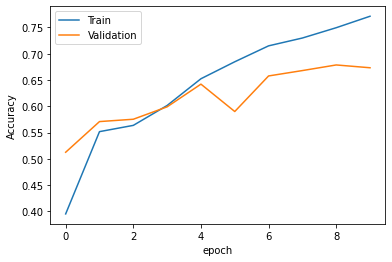

In [ ]:
import matplotlib.pyplot as plt

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Since the lengths of news are different, we cannot pass different length data into our neural network. Therefore, we must make each news the same length. 'pad_sequences' is used to solve this problem. If the news length is less than 'maxlen=500'(in my case), add 0 in the front of the news. If news length is more than that, get rid of the front part. 


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*
LSTM works very similarily to the traditionnal RNN, but it adds a way to access inputs from any timestep in the past. Whereas in the traditionnal RNN, input from previous timestamps gradually disappeared as we got further through the input. With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. This allows for us to access any previous value we want at any point in time. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*
1. Character Predictive Model. We show the LSTM a lot of examples of something we want it to recreate, it will learn how to write a version of it on its own. For example, we showed LSTM the Shakespeare play, it will take as input a variable length sequence and predict the next character. 

2. Automatic Speech Recognition (ASR). For example, the iphone Siri and Amazon Alexa, they are able to have conversation with human bidirectionally. In these cases, LSTM is suitable, since millions of conversations need to be showed to the model beforehand, then the model is able to predict what the human is going to say and give them feedback. 

3. Computer-composed Music. Tons of music and pieces can be fed into LSTM to learn, the model can learn the pattern of chord, and predict the next sound.   

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

In [12]:
from skimage.io import imread_collection

images = imread_collection('/content/frog_images/*.jpg')

In [2]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



In [13]:
images[0].shape

(2137, 1710, 3)

In [14]:
from skimage.transform import resize

In [21]:
resized_images = []
for i in range(15):
  resized_images.append(resize(images[i], (224,224)))

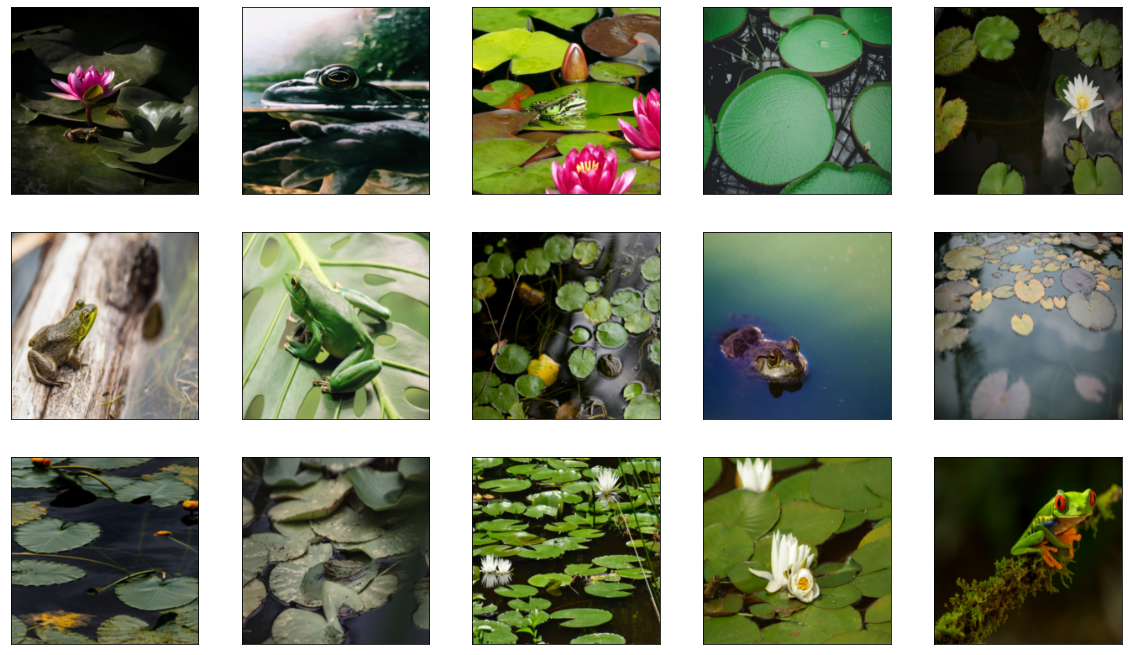

In [ ]:
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(resized_images[i])
plt.show()

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [22]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
# TODO - your code!

In [23]:
frogs = ['frog', 'bullfrog', 'tree frog', 'tailed frog']

In [46]:
def img_contains_frog(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50V2(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=-1)[0]
  for result in results:
    # print('=========================')
    if result[1] in frogs:
      print('Find it!')
      print(result[1])
      print(result[2])
      plt.imshow(img)
    # else:
    #   print('Not Find!')
    #   print(result[1])
    #   print(result[2])

In [43]:
import matplotlib.pyplot as plt

Find it!
bullfrog
0.00069078413
Find it!
bullfrog
0.0021968374
Find it!
bullfrog
0.0005651613
Find it!
bullfrog
0.00053937844
Find it!
bullfrog
0.0005609716
Find it!
bullfrog
0.00056132016
Find it!
bullfrog
0.0007333607
Find it!
bullfrog
0.0005300794
Find it!
bullfrog
0.00058619515
Find it!
bullfrog
0.00047588462
Find it!
bullfrog
0.0006849315
Find it!
bullfrog
0.0005357739
Find it!
bullfrog
0.0010929396
Find it!
bullfrog
0.00063983694
Find it!
bullfrog
0.00054376


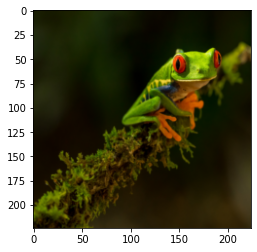

In [47]:
for i in range(15):
  img_contains_frog(resized_images[i])

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
One use case is for when visualizing high-dimensional data is an issue. Autoencoders is used as a preprocessing step to reduce the dimensionality, and this compressed representation is used to visualize the data in 2-D space.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
Clean, organize dataset, use traditional machine learning model to do prediction.
- What area of Data Science would you most like to learn more about, and why?
Deep learning area would be preferred, since with deep learning models, data scientist is able to slove more complicated problems. 
- Where do you think Data Science will be in 5 years?
Data Science will be even more deeply entrenched into every sector of life. More and more data will be available, and more advanced technology will be appeared to analyze these data and dig out more information. 
- What are the threats posed by AI to our society?
More and more jobs will be replaced by AI technology, some industries will be disappeared. In addition, people's privacy information will be hard to protect. The society will be more transparent. 
- How do you think we can counteract those threats? 
We should build more ethical policies and enforce those already exist. Minimizing evil activities performed by people using technology. 
- Do you think achieving General Artifical Intelligence is ever possible?
I think so. I believe that the breakthroughs will be made in order for AI to take the next big step. 
A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")